In [1]:
from sympy import *

In [2]:
r, mu, alpha,beta , nu, psi = symbols('r mu alpha beta nu psi')

In [3]:
eqpsi0 = (1+r**2)/(2*r)*(mu*r*sin(alpha)-nu*sin(psi-alpha)) - mu*sin(alpha) - nu*r*sin(psi+alpha)
eqpsi1 = eqpsi0.subs(alpha,pi/2 - beta)

eqr0 = (1-r**2)/(2)*(mu*r*cos(alpha)+nu*cos(psi-alpha))
eqr1 = eqr0.subs(alpha,pi/2 - beta)

In [4]:
A_ans = (sin(beta+psi) + r*sin(beta)) / (sin(beta+psi) - r*sin(beta))
A = symbols('A')
mu1 = (1+A)/2
nu1 = (1-A)/2

eq_psi = eqpsi1.subs(nu,nu1).subs(mu,mu1).simplify()
eq_r = eqr1.subs(nu,nu1).subs(mu,mu1).simplify()

In [5]:
eq_r

(1 - r**2)*(r*(A + 1)*sin(beta) + (1 - A)*sin(beta + psi))/4

In [6]:
eq_r

(1 - r**2)*(r*(A + 1)*sin(beta) + (1 - A)*sin(beta + psi))/4

In [7]:
EQ = Eq(0,eq_psi)

In [8]:
d_rr =eqr1.diff(r).simplify()
d_rpsi =eqr1.diff(psi).simplify()


d_psir =eqpsi1.diff(r).simplify()
d_psipsi =eqpsi1.diff(psi).simplify()


In [9]:
SOL_r = solve(eq_psi.subs(A,A_ans).simplify(),r)[1]

In [10]:

A_ans = (sin(beta+psi) + r*sin(beta)) / (sin(beta+psi) - r*sin(beta))
# A = symbols('A')
mu2 = (1+A_ans)/2
nu2 = (1-A_ans)/2

eq11 = eqr1.diff(r).subs([(mu,mu2),(nu,nu2)]).simplify()
eq12 = eqr1.diff(psi).subs([(mu,mu2),(nu,nu2)]).simplify()
eq21 = eqpsi1.diff(r).subs([(mu,mu2),(nu,nu2)]).simplify()
eq22 = eqpsi1.diff(psi).subs([(mu,mu2),(nu,nu2)]).simplify()
J = Matrix([[eq11,eq12],[eq21,eq22]])

In [11]:
print_latex(J)

\left[\begin{matrix}\frac{\left(\frac{r^{2}}{2} - \frac{1}{2}\right) \sin{\left(\beta \right)} \sin{\left(\beta + \psi \right)}}{r \sin{\left(\beta \right)} - \sin{\left(\beta + \psi \right)}} & \frac{r \left(1 - r^{2}\right) \sin{\left(\beta \right)} \cos{\left(\beta + \psi \right)}}{2 \left(r \sin{\left(\beta \right)} - \sin{\left(\beta + \psi \right)}\right)}\\- \frac{3 r^{2} \sin{\left(\beta \right)} \cos{\left(\beta - \psi \right)} + 2 r^{2} \sin{\left(\psi \right)} \cos^{2}{\left(\beta \right)} + \sin{\left(\beta \right)} \cos{\left(\beta + \psi \right)}}{2 r \left(r \sin{\left(\beta \right)} - \sin{\left(\beta + \psi \right)}\right)} & \frac{\left(- 2 r^{2} \sin{\left(\beta - \psi \right)} + \left(- r^{2} - 1\right) \sin{\left(\beta + \psi \right)}\right) \sin{\left(\beta \right)}}{2 \left(r \sin{\left(\beta \right)} - \sin{\left(\beta + \psi \right)}\right)}\end{matrix}\right]


In [12]:

A_ans = (sin(beta+psi) + r*sin(beta)) / (sin(beta+psi) - r*sin(beta))
# A = symbols('A')
mu2 = (1+A_ans)/2
nu2 = (1-A_ans)/2

eq11 = eqr1.diff(r).simplify()
eq12 = eqr1.diff(psi).simplify()
eq21 = eqpsi1.diff(r).simplify()
eq22 = eqpsi1.diff(psi).simplify()
J = Matrix([[eq11,eq12],[eq21,eq22]])

In [486]:
eq11+eq22

-3*mu*r**2*sin(beta)/2 + mu*sin(beta)/2 - nu*r*sin(beta + psi) + nu*(-2*r**2*sin(beta - psi) + (-r**2 - 1)*sin(beta + psi))/(2*r)

In [488]:
Tra = eqr1.diff(r).subs([(mu,mu2),(nu,nu2)]).simplify() + eqpsi1.diff(psi).subs([(mu,mu2),(nu,nu2)]).simplify()

In [491]:
SOL_r

sqrt(sin(2*beta + psi)/(2*sin(psi) + sin(2*beta - psi)))

In [494]:
Tra = Tra.subs(r,SOL_r).simplify()

In [500]:
N,D =fraction(expand_trig(Tra))

In [504]:
print_latex(N)

\left(- 4 \sin{\left(\beta \right)} \sin{\left(\psi \right)} \cos{\left(\psi \right)} + 8 \cos^{3}{\left(\beta \right)} - 8 \cos{\left(\beta \right)}\right) \sin{\left(\beta \right)}


In [505]:
Nn = -2*cos(beta)+2*cos(3*beta) - cos(beta-2*psi) + cos(beta+2*psi)

In [508]:
expand_trig(Nn).collect(cos(beta))

-4*sin(beta)*sin(psi)*cos(psi) + 8*cos(beta)**3 - 8*cos(beta)

In [498]:
solve(Tra,psi)

[-I*log(-sqrt(-exp(-I*beta))),
 -I*log(-sqrt(-exp(I*beta))),
 -I*log(-exp(-I*beta))/2,
 -I*log(-exp(I*beta))/2]

In [497]:
print_latex(Tra)

\frac{\left(- 2 \cos{\left(\beta \right)} + 2 \cos{\left(3 \beta \right)} - \cos{\left(\beta - 2 \psi \right)} + \cos{\left(\beta + 2 \psi \right)}\right) \sin{\left(\beta \right)}}{2 \left(\sqrt{\frac{\sin{\left(2 \beta + \psi \right)}}{2 \sin{\left(\psi \right)} + \sin{\left(2 \beta - \psi \right)}}} \sin{\left(\beta \right)} - \sin{\left(\beta + \psi \right)}\right) \left(2 \sin{\left(\psi \right)} + \sin{\left(2 \beta - \psi \right)}\right)}


In [495]:
expand_trig(Tra)

(-4*sin(beta)*sin(psi)*cos(psi) + 8*cos(beta)**3 - 8*cos(beta))*sin(beta)/(2*(sqrt(((2*cos(beta)**2 - 1)*sin(psi) + 2*sin(beta)*cos(beta)*cos(psi))/(-(2*cos(beta)**2 - 1)*sin(psi) + 2*sin(beta)*cos(beta)*cos(psi) + 2*sin(psi)))*sin(beta) - sin(beta)*cos(psi) - sin(psi)*cos(beta))*(-(2*cos(beta)**2 - 1)*sin(psi) + 2*sin(beta)*cos(beta)*cos(psi) + 2*sin(psi)))

In [490]:
print_latex(Tra.simplify())

- \frac{\left(r^{2} \sin{\left(\beta - \psi \right)} + \sin{\left(\beta + \psi \right)}\right) \sin{\left(\beta \right)}}{r \sin{\left(\beta \right)} - \sin{\left(\beta + \psi \right)}}


In [20]:
J = Matrix([[d_rr,d_rpsi],[d_psir,d_psipsi]])

In [21]:
J_DET =  J.det().factor()

In [22]:
solve(J_DET,r)

[]

In [23]:
print_latex(solve(J_DET,r))

\left[ \right]


In [24]:
TEMP = J_DET.subs(mu,(1+A_ans)/2).subs(nu,(1-A_ans)/2).factor().factor(r)#.simplify().factor()

In [27]:
solve(TEMP,r)

[-1,
 1,
 -sqrt(-sin(beta)/(sin(beta - 2*psi) + 2*sin(beta + 2*psi))),
 sqrt(-sin(beta)/(sin(beta - 2*psi) + 2*sin(beta + 2*psi)))]

In [305]:
print_latex(TEMP)

- \frac{\left(r - 1\right) \left(r + 1\right) \left(2 r^{2} \sin{\left(\beta \right)} \sin{\left(\beta - \psi \right)} \sin{\left(\beta + \psi \right)} + r^{2} \sin{\left(\beta \right)} \sin^{2}{\left(\beta + \psi \right)} + 3 r^{2} \sin{\left(\beta \right)} \cos{\left(\beta - \psi \right)} \cos{\left(\beta + \psi \right)} + 2 r^{2} \sin{\left(\psi \right)} \cos^{2}{\left(\beta \right)} \cos{\left(\beta + \psi \right)} + \sin{\left(\beta \right)} \sin^{2}{\left(\beta + \psi \right)} + \sin{\left(\beta \right)} \cos^{2}{\left(\beta + \psi \right)}\right) \sin{\left(\beta \right)}}{4 \left(r \sin{\left(\beta \right)} - \sin{\left(\beta + \psi \right)}\right)^{2}}


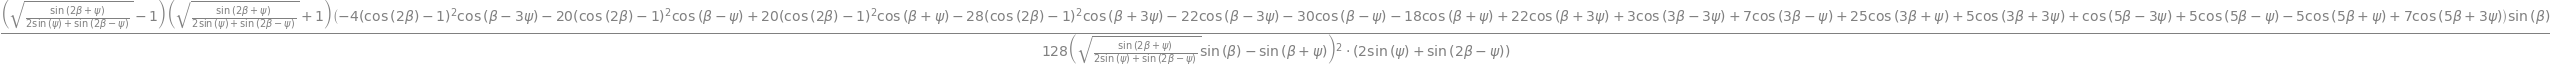

In [281]:
TEMP.subs(r,SOL_r).simplify()

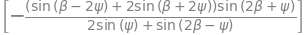

In [303]:
solve(Eq(solve(Eq(0,TEMP),r)[2],SOL_r),sin(beta))

In [197]:
J_SUB = J.subs(r,SOL_r).subs(A,A_ans)
J_sim = Matrix([[J_SUB[0].simplify(),J_SUB[1].simplify()],[J_SUB[2].simplify(),J_SUB[3].simplify()]]) 

In [198]:
J_SUB

⎡                                                   _________________________ 
⎢                                                  ╱       sin(2⋅β + ψ)       
⎢                                                 ╱  ─────────────────────── ⋅
⎢                                               ╲╱   2⋅sin(ψ) + sin(2⋅β - ψ)  
⎢                                             - ──────────────────────────────
⎢                                                                             
⎢                                                                             
⎢    _________________________              _________________________         
⎢   ╱       sin(2⋅β + ψ)                   ╱       sin(2⋅β + ψ)               
⎢  ╱  ─────────────────────── ⋅cos(β)     ╱  ─────────────────────── ⋅(r⋅sin(β
⎢╲╱   2⋅sin(ψ) + sin(2⋅β - ψ)           ╲╱   2⋅sin(ψ) + sin(2⋅β - ψ)          
⎢──────────────────────────────────── + ──────────────────────────────────────
⎢                 2                                 

In [199]:
J_SIM_DET = J_sim.det().simplify()

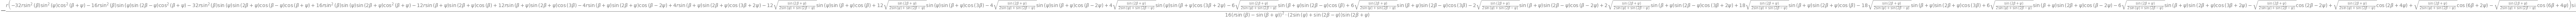

In [200]:
J_SIM_DET.factor()

In [156]:
J_det = JJ.det().simplify()

In [159]:
SOL_r = solve(eq_psi.subs(A,A_ans).simplify(),r)[1]

In [161]:
SOL_J_det = J_det.subs(r,SOL_r)

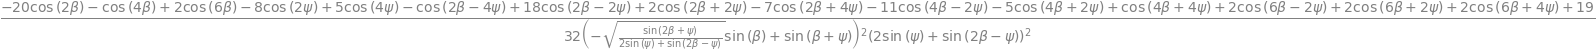

In [163]:
SOL_J_det.simplify()

In [375]:
acos(psi).series(psi,0,20)

In [105]:
eq_br = sin(beta)*(sin(2*beta-psi)+2*sin(psi)) + sin(2*beta+psi)*(sin(beta-2*psi)+2*sin(beta+2*psi))
# POLY = eq_br.series(psi,0,3)
E_tri = expand_trig(eq_br)

In [138]:
T = E_tri.series(psi,0,3)

In [139]:
x,y =symbols('x y')

In [425]:
CB =cos(beta).series(beta,0,3).removeO()
SB =sin(beta).series(beta,0,4).removeO()
Cpsi =cos(psi).series(psi,0,3).removeO()
Spsi =sin(psi).series(psi,0,4).removeO()

s_end =9

S_b_P_psi = sin(beta+psi).series(beta+psi,0,s_end).removeO()
S_b_M_2psi = sin(beta-2*psi).series(beta-2*psi,0,s_end).removeO()
S_b_P_2psi = sin(beta+2*psi).series(beta+2*psi,0,s_end).removeO()
S_2b_M_psi = sin(2*beta-psi).series(2*beta-psi,0,s_end).removeO()
S_2b_P_psi = sin(2*beta+psi).series(2*beta+psi,0,s_end).removeO()
S_b= sin(beta).series(beta,0,s_end).removeO()
S_psi= sin(psi).series(psi,0,s_end).removeO()
S_psi

-psi**7/5040 + psi**5/120 - psi**3/6 + psi

In [409]:
print_latex(sin(x).series(x,0,9))

x - \frac{x^{3}}{6} + \frac{x^{5}}{120} - \frac{x^{7}}{5040} + O\left(x^{9}\right)


In [410]:
S_b_M_2psi

beta - 2*psi - (beta - 2*psi)**3/6

In [411]:
a,b,c,d,e,f,g,h = symbols('a b c d e f g h')

In [412]:
expand_trig(sin(a+b+c))

(-sin(b)*sin(c) + cos(b)*cos(c))*sin(a) + (sin(b)*cos(c) + sin(c)*cos(b))*cos(a)

In [413]:
eq_br.series(beta,0,10)

sin(psi)*sin(2*psi) + beta*(3*sin(psi)*cos(2*psi) + sin(psi) + 2*sin(2*psi)*cos(psi)) + beta**2*(-5*sin(psi)*sin(2*psi)/2 + 6*cos(psi)*cos(2*psi) + 2*cos(psi)) + beta**3*(-13*sin(psi)*cos(2*psi)/2 + 11*sin(psi)/6 - 7*sin(2*psi)*cos(psi)/3) + beta**4*(41*sin(psi)*sin(2*psi)/24 - 5*cos(psi)*cos(2*psi) - 5*cos(psi)/3) + beta**5*(121*sin(psi)*cos(2*psi)/40 - 119*sin(psi)/120 + 61*sin(2*psi)*cos(psi)/60) + beta**6*(-73*sin(psi)*sin(2*psi)/144 + 91*cos(psi)*cos(2*psi)/60 + 91*cos(psi)/180) + beta**7*(-1093*sin(psi)*cos(2*psi)/1680 + 1091*sin(psi)/5040 - 547*sin(2*psi)*cos(psi)/2520) + beta**8*(3281*sin(psi)*sin(2*psi)/40320 - 41*cos(psi)*cos(2*psi)/168 - 41*cos(psi)/504) + beta**9*(9841*sin(psi)*cos(2*psi)/120960 - 9839*sin(psi)/362880 + 703*sin(2*psi)*cos(psi)/25920) + O(beta**10)

In [414]:
S_EQ = eq_br.subs([(sin(beta-2*psi),S_b_M_2psi),(sin(beta+2*psi),S_b_P_2psi),( sin(2*beta-psi),S_2b_M_psi),(sin(2*beta+psi),S_2b_P_psi),(sin(beta),S_b),(sin(psi),S_psi)])
# SUBS = S_EQ.subs(psi,-2*beta+-2*beta**2+2*beta**3+Rational('11/3')*beta**4-12*beta**5-d*beta**6)
# SUBS = S_EQ.subs(psi,a+-2*beta+-2*beta**2+2*beta**3+Rational(11,3)*beta**4+-12*beta**5+e*beta**6)
SUBS = S_EQ.subs(psi,-2*beta-2*beta**2+2*beta**3+Rational(11,3)*beta**4+-12*beta**5-Rational(3271,180)*beta**6+h*beta**7)
# SUBS.expand().collect(beta)
solve(Poly(SUBS.expand(),beta).coeffs()[-1],h)

[]

In [567]:
SOL_psi = -2*beta-2*beta**2+2*beta**3+Rational(11,3)*beta**4+-12*beta**5-Rational(3271,180)*beta**6

In [416]:
SOL_R_sub =SOL_r.subs([(sin(beta-2*psi),S_b_M_2psi),(sin(beta+2*psi),S_b_P_2psi),( sin(2*beta-psi),S_2b_M_psi),(sin(2*beta+psi),S_2b_P_psi),(sin(beta),S_b),(sin(psi),S_psi)])
SOL_rpsi_sub = SOL_R_sub.series(beta,0,4).subs(psi,SOL_psi)

In [441]:
R_up = (S_2b_P_psi).subs(psi,SOL_psi).expand(psi)
R_down = (S_2b_M_psi + 2*S_psi).subs(psi,SOL_psi).expand(psi)

r_s = sqrt(R_up,R_down).series(beta,0,5)

In [456]:
SOL_A = (S_b*SOL_r+S_b_P_psi) -A*(-S_b*SOL_r+S_b_P_psi )
SOL_A = SOL_A.subs(psi,SOL_psi).removeO()

In [537]:
UP = sin(2*beta+SOL_psi).series(beta,0,9).removeO()
DOWN = sin(2*beta-SOL_psi).series(beta,0,9).removeO() + 2*sin(SOL_psi).series(beta,0,9).removeO()
r_s = sqrt(UP/DOWN).series(beta,0,9)

In [538]:
print_latex(r_s)

1 - 2 \beta + 2 \beta^{2} + \frac{\beta^{3}}{3} + \frac{16 \beta^{4}}{3} - \frac{1441 \beta^{5}}{60} + \frac{686 \beta^{6}}{9} - \frac{15827 \beta^{7}}{135} + \frac{10691 \beta^{8}}{180} + O\left(\beta^{9}\right)


In [539]:
print_latex(r_s)

1 - 2 \beta + 2 \beta^{2} + \frac{\beta^{3}}{3} + \frac{16 \beta^{4}}{3} - \frac{1441 \beta^{5}}{60} + \frac{686 \beta^{6}}{9} - \frac{15827 \beta^{7}}{135} + \frac{10691 \beta^{8}}{180} + O\left(\beta^{9}\right)


In [540]:
UP_A = sin(beta+SOL_psi).series(beta,0,9).removeO() + r_s*sin(beta).series(beta,0,9).removeO()
DOWN_A = sin(beta+SOL_psi).series(beta,0,9).removeO() - r_s*sin(beta).series(beta,0,9).removeO()
A_SN = (UP_A/DOWN_A).series(beta,0,6)
print_latex(A_SN)

2 \beta - 2 \beta^{2} - \frac{7 \beta^{3}}{3} + \frac{20 \beta^{4}}{3} + \frac{181 \beta^{5}}{60} + O\left(\beta^{6}\right)


In [485]:
print_latex((UP_A/DOWN_A))


\frac{\frac{4469 \beta^{8}}{120} - \frac{18059 \beta^{7}}{5040} - \frac{1024 \beta^{6}}{45} - \frac{1321 \beta^{5}}{120} + \frac{14 \beta^{4}}{3} + \frac{13 \beta^{3}}{6} - 2 \beta^{2} - \beta + \left(- \frac{\beta^{7}}{5040} + \frac{\beta^{5}}{120} - \frac{\beta^{3}}{6} + \beta\right) \left(\frac{10691 \beta^{8}}{180} - \frac{15827 \beta^{7}}{135} + \frac{686 \beta^{6}}{9} - \frac{1441 \beta^{5}}{60} + \frac{16 \beta^{4}}{3} + \frac{\beta^{3}}{3} + 2 \beta^{2} - 2 \beta + 1\right)}{\frac{4469 \beta^{8}}{120} - \frac{18059 \beta^{7}}{5040} - \frac{1024 \beta^{6}}{45} - \frac{1321 \beta^{5}}{120} + \frac{14 \beta^{4}}{3} + \frac{13 \beta^{3}}{6} - 2 \beta^{2} - \beta - \left(- \frac{\beta^{7}}{5040} + \frac{\beta^{5}}{120} - \frac{\beta^{3}}{6} + \beta\right) \left(\frac{10691 \beta^{8}}{180} - \frac{15827 \beta^{7}}{135} + \frac{686 \beta^{6}}{9} - \frac{1441 \beta^{5}}{60} + \frac{16 \beta^{4}}{3} + \frac{\beta^{3}}{3} + 2 \beta^{2} - 2 \beta + 1\right)}


In [473]:
(UP_A/DOWN_A)

(4469*beta**8/120 - 18059*beta**7/5040 - 1024*beta**6/45 - 1321*beta**5/120 + 14*beta**4/3 + 13*beta**3/6 - 2*beta**2 - beta + (-beta**7/5040 + beta**5/120 - beta**3/6 + beta)*(10691*beta**8/180 - 15827*beta**7/135 + 686*beta**6/9 - 1441*beta**5/60 + 16*beta**4/3 + beta**3/3 + 2*beta**2 - 2*beta + 1))/(4469*beta**8/120 - 18059*beta**7/5040 - 1024*beta**6/45 - 1321*beta**5/120 + 14*beta**4/3 + 13*beta**3/6 - 2*beta**2 - beta - (-beta**7/5040 + beta**5/120 - beta**3/6 + beta)*(10691*beta**8/180 - 15827*beta**7/135 + 686*beta**6/9 - 1441*beta**5/60 + 16*beta**4/3 + beta**3/3 + 2*beta**2 - 2*beta + 1))

In [457]:
SOL_A.collect(beta).expand()

-4006487654692822399028791*A*beta**42/30855889612800000000 - 1224851010300465423121*A*beta**41/2040733440000000 - 73880122128178394226949*A*beta**40/73466403840000000 - 5901296938385272845119*A*beta**39/12244400640000000 + 6375891828779848645709*A*beta**38/12244400640000000 + 10630755608907205139039*A*beta**37/24488801280000000 - 11983047098420654171*A*beta**36/20407334400000 - 360706587422304267589*A*beta**35/476171136000000 + 60383233316566889*A*beta**34/680244480000 + 624793671356417203*A*beta**33/1417176000000 - 1032331446172735751*A*beta**32/45349632000000 - 6626280008956753*A*beta**31/22674816000 - 1068770881473366599*A*beta**30/22674816000000 + 4219527674927731*A*beta**29/25194240000 + 23815712765465441*A*beta**28/264539520000 - 7873074861729613*A*beta**27/151165440000 - 243790683903833*A*beta**26/4199040000 + 56261700627329*A*beta**25/2799360000 + 151667343779*A*beta**24/3280500 + 233674440527*A*beta**23/34992000 - 15252821584087*A*beta**22/839808000 - 172489162081*A*beta**21/4

In [434]:
SOL_A.coeffs()[::-1]

[-A*r + A + r - 1,
 2*A - 2,
 A*r/6 - 13*A/6 - r/6 + 13/6,
 14/3 - 14*A/3,
 -A*r/120 + 1321*A/120 + r/120 - 1321/120,
 1024*A/45 - 1024/45,
 A*r/5040 + 18059*A/5040 - r/5040 - 18059/5040,
 4469/120 - 4469*A/120,
 20929/360 - 20929*A/360,
 379229*A/4320 - 379229/4320,
 44407*A/270 - 44407/270,
 14373037/43200 - 14373037*A/43200,
 48959837/64800 - 48959837*A/64800,
 42005489*A/226800 - 42005489/226800,
 501094939*A/388800 - 501094939/388800,
 3040529/32400 - 3040529*A/32400,
 24450160681/7776000 - 24450160681*A/7776000,
 6620156851/2187000 - 6620156851*A/2187000,
 321415349*A/86400 - 321415349/86400,
 148381380019*A/17496000 - 148381380019/17496000,
 172489162081/40824000 - 172489162081*A/40824000,
 15252821584087/839808000 - 15252821584087*A/839808000,
 233674440527*A/34992000 - 233674440527/34992000,
 151667343779*A/3280500 - 151667343779/3280500,
 56261700627329*A/2799360000 - 56261700627329/2799360000,
 243790683903833/4199040000 - 243790683903833*A/4199040000,
 7873074861729613/1511

In [ ]:
SOL_r.subs()

In [394]:
SOL_r.subs(sin()).subs(psi,SOL_psi).series(beta,0,5)

KeyboardInterrupt: 

In [381]:
SOL_rpsi_sub.simplify()

(5906010121200000 + 11812020242400000*beta**2 + O(beta**3))/(259200*(8*beta**24 - 432*beta**22 + 12312*beta**20 - 232632*beta**18 + 3177468*beta**16 - 32577552*beta**14 + 253639512*beta**12 - 1491708960*beta**10 + 6471573570*beta**8 - 19771573500*beta**6 + 39494923650*beta**4 - 45571065750*beta**2 + 22785532875))

In [378]:
SOL_rpsi_sub

sqrt((-3271*beta**6/180 - 12*beta**5 + 11*beta**4/3 + 2*beta**3 - 2*beta**2 + (-3271*beta**6/180 - 12*beta**5 + 11*beta**4/3 + 2*beta**3 - 2*beta**2)**9/362880 - (-3271*beta**6/180 - 12*beta**5 + 11*beta**4/3 + 2*beta**3 - 2*beta**2)**7/5040 + (-3271*beta**6/180 - 12*beta**5 + 11*beta**4/3 + 2*beta**3 - 2*beta**2)**5/120 - (-3271*beta**6/180 - 12*beta**5 + 11*beta**4/3 + 2*beta**3 - 2*beta**2)**3/6)/(-3271*beta**6/180 - 12*beta**5 + 11*beta**4/3 + 2*beta**3 - 2*beta**2 + (-3271*beta**6/180 - 12*beta**5 + 11*beta**4/3 + 2*beta**3 - 2*beta**2 - 2*beta)**9/181440 - (-3271*beta**6/180 - 12*beta**5 + 11*beta**4/3 + 2*beta**3 - 2*beta**2 - 2*beta)**7/2520 + (-3271*beta**6/180 - 12*beta**5 + 11*beta**4/3 + 2*beta**3 - 2*beta**2 - 2*beta)**5/60 - (-3271*beta**6/180 - 12*beta**5 + 11*beta**4/3 + 2*beta**3 - 2*beta**2 - 2*beta)**3/3 + (3271*beta**6/180 + 12*beta**5 - 11*beta**4/3 - 2*beta**3 + 2*beta**2 + 4*beta)**9/362880 - (3271*beta**6/180 + 12*beta**5 - 11*beta**4/3 - 2*beta**3 + 2*beta**2 +

In [332]:
Poly(SUBS.expand(),beta)

Poly((d**18/257191200 - d**17/7144200 + 17*d**16/7144200 - 68*d**15/2679075 + 34*d**14/178605 - 136*d**13/127575 + 1768*d**12/382725 - 14144*d**11/893025 + 38896*d**10/893025 - 155584*d**9/1607445 + 155584*d**8/893025 - 226304*d**7/893025 + 113152*d**6/382725 - 34816*d**5/127575 + 34816*d**4/178605 - 278528*d**3/2679075 + 34816*d**2/893025 - 8192*d/893025 + 8192/8037225)*beta**36 + (-d**17/57153600 + 17*d**16/28576800 - 17*d**15/1786050 + 17*d**14/178605 - 17*d**13/25515 + 442*d**12/127575 - 1768*d**11/127575 + 38896*d**10/893025 - 19448*d**9/178605 + 38896*d**8/178605 - 311168*d**7/893025 + 56576*d**6/127575 - 56576*d**5/127575 + 8704*d**4/25515 - 34816*d**3/178605 + 69632*d**2/893025 - 17408*d/893025 + 2048/893025)*beta**35 + (-d**16/4082400 + d**15/127575 - d**14/8505 + 4*d**13/3645 - 26*d**12/3645 + 208*d**11/6075 - 2288*d**10/18225 + 9152*d**9/25515 - 2288*d**8/2835 + 36608*d**7/25515 - 36608*d**6/18225 + 13312*d**5/6075 - 6656*d**4/3645 + 4096*d**3/3645 - 4096*d**2/8505 + 16384*d

In [321]:
SUBS.expand().collect(beta)

beta**18*(b**18/257191200 + b**17/8164800 + 11*b**16/7144200 + 1873*b**15/171460800 + 11519*b**14/228614400 + 10663*b**13/65318400 + 76547*b**12/195955200 + 13351*b**11/18662400 + 7507121*b**10/7315660800 + 19136137*b**9/16460236800 + 1891429*b**8/1828915200 + 109033*b**7/152409600 + 7561*b**6/19595520 + 1777*b**5/10886400 + 2929*b**4/57153600 + 311*b**3/28576800 + 61*b**2/28576800 + b/9525600 + 1/64297800) + beta**16*(-b**16/2857680 - 277*b**15/28576800 - 391*b**14/3810240 - 9803*b**13/16329600 - 14741*b**12/6531840 - 129127*b**11/21772800 - 42919*b**10/3732480 - 1942091*b**9/114307200 - 1487*b**8/76800 - 971041*b**7/57153600 - 93589*b**6/8164800 - 21517*b**5/3628800 - 9229*b**4/4082400 - 65*b**3/108864 - 8*b**2/59535 - 13*b/1587600 - 1/714420) + beta**14*(167*b**14/9525600 + 1139*b**13/2721600 + 9691*b**12/2721600 + 12701*b**11/777600 + 1044301*b**10/21772800 + 540361*b**9/5443200 + 8633*b**8/56700 + 222739*b**7/1270080 + 220279*b**6/1451520 + 540091*b**5/5443200 + 262751*b**4/544320

In [314]:
SUBS

(beta**9/362880 - beta**7/5040 + beta**5/120 - beta**3/6 + beta)*(a + b*beta + beta**6*g + beta**5*f + beta**4*e + beta**3*d + beta**2*c + 2*beta + (a + b*beta + beta**6*g + beta**5*f + beta**4*e + beta**3*d + beta**2*c)**9/181440 - (a + b*beta + beta**6*g + beta**5*f + beta**4*e + beta**3*d + beta**2*c)**7/2520 + (a + b*beta + beta**6*g + beta**5*f + beta**4*e + beta**3*d + beta**2*c)**5/60 - (a + b*beta + beta**6*g + beta**5*f + beta**4*e + beta**3*d + beta**2*c)**3/3 + (-a - b*beta - beta**6*g - beta**5*f - beta**4*e - beta**3*d - beta**2*c + 2*beta)**9/362880 - (-a - b*beta - beta**6*g - beta**5*f - beta**4*e - beta**3*d - beta**2*c + 2*beta)**7/5040 + (-a - b*beta - beta**6*g - beta**5*f - beta**4*e - beta**3*d - beta**2*c + 2*beta)**5/120 - (-a - b*beta - beta**6*g - beta**5*f - beta**4*e - beta**3*d - beta**2*c + 2*beta)**3/6) + (a + b*beta + beta**6*g + beta**5*f + beta**4*e + beta**3*d + beta**2*c + 2*beta + (a + b*beta + beta**6*g + beta**5*f + beta**4*e + beta**3*d + beta**2

In [304]:
Poly(SUBS.expand(),beta).coeffs()[-1]

a**18/257191200 - a**16/2857680 + 167*a**14/9525600 - 137*a**12/272160 + 7381*a**10/907200 - 41*a**8/504 + 91*a**6/180 - 5*a**4/3 + 2*a**2

In [273]:
8*45

360

In [279]:
Rational('6542/360')

3271/180

In [185]:
C = E_tri.subs(sin(beta),SB).subs(cos(beta),CB).subs(sin(psi),Spsi).subs(cos(psi),Cpsi)#.subs(cos(psi)**2,Cpsi**2)

In [143]:
solve(T,psi)

[(sqrt(2)*sqrt((72*sin(beta)**4*cos(beta) + O(psi**3))*cos(beta)) - 4*sin(beta)*cos(beta)**2)/(2*(1 - 10*sin(beta)**2)*cos(beta)),
 (sqrt(2)*sqrt((72*sin(beta)**4*cos(beta) + O(psi**3))*cos(beta)) + 4*sin(beta)*cos(beta)**2)/(2*(10*sin(beta)**2 - 1)*cos(beta))]

In [132]:
T = C.simplify().subs(psi,-2*beta + a*beta**2)
solve(T,a)

[2*(beta**3 - 3*beta - sqrt(4 - beta**2))/(beta**4 - 4*beta**2 + 2),
 2*(beta**3 - 3*beta + sqrt(4 - beta**2))/(beta**4 - 4*beta**2 + 2)]

In [133]:
solve(C,psi)

[2*beta*(beta**2 - beta*sqrt(4 - beta**2) - 2)/(beta**4 - 4*beta**2 + 2),
 2*beta*(beta**2 + beta*sqrt(4 - beta**2) - 2)/(beta**4 - 4*beta**2 + 2)]

In [347]:
SOL_BP =  series(eq_br,beta).removeO()

In [361]:
solve

# Hopf bifurcation curve

In [521]:
SOL_psi_H = -Rational(1,2)*asin(2*sin(2*beta))

In [526]:
psi_H = SOL_psi_H.series(beta,0,8).removeO()

In [527]:
print_latex(psi_H)

- \frac{3704 \beta^{7}}{15} - 28 \beta^{5} - 4 \beta^{3} - 2 \beta


In [533]:
UP = sin(2*beta+psi_H).series(beta,0,9).removeO()
DOWN = sin(2*beta-psi_H).series(beta,0,9).removeO() + 2*sin(psi_H).series(beta,0,9).removeO()
r_s = sqrt(UP/DOWN).series(beta,0,9).removeO()

In [529]:
print_latex(sqrt(UP/DOWN))

\sqrt{\frac{- \frac{3704 \beta^{7}}{15} - 28 \beta^{5} - 4 \beta^{3}}{- \frac{1624 \beta^{7}}{5} - 36 \beta^{5} - 12 \beta^{3}}}


In [535]:
UP_A = sin(beta+psi_H).series(beta,0,9).removeO() + r_s*sin(beta).series(beta,0,9).removeO()
DOWN_A = sin(beta+psi_H).series(beta,0,9).removeO() - r_s*sin(beta).series(beta,0,9).removeO()
A_H = (UP_A/DOWN_A).series(beta,0,6).simplify()
# print_latex((UP_A/DOWN_A).series(beta,0,6))

In [536]:
print_latex(A_H)


2 - \sqrt{3} + 4 \sqrt{3} \beta^{2} - 6 \beta^{2} + \frac{26 \sqrt{3} \beta^{4}}{3} - 10 \beta^{4} + O\left(\beta^{6}\right)


In [558]:
P = Poly((A_H - A_SN).removeO(),beta)

In [564]:
(A_H - A_SN)

2 - sqrt(3) - 2*beta + 4*sqrt(3)*beta**2 - 4*beta**2 + 7*beta**3/3 + 26*sqrt(3)*beta**4/3 - 50*beta**4/3 - 181*beta**5/60 + O(beta**6)

In [565]:
Y = 2-sqrt(3) -2*x + (-4+4*sqrt(3))*x**2 + Rational(7/3)*x**3

In [566]:
solve(Y,x)

[-9007199254740992*sqrt(3)/15762598695796737 + 9007199254740992/15762598695796737 - (-1/2 + sqrt(3)*I/2)*(22817710804108119093841496113152*sqrt(3)/27606613071636999357616802205241 + (-9007199254740992/5254199565265579 + 9007199254740992*sqrt(3)/5254199565265579)**3 + 136906264824648795627842269347840/27606613071636999357616802205241 + sqrt(-4*((-9007199254740992/5254199565265579 + 9007199254740992*sqrt(3)/5254199565265579)**2 + 13510798882111488/5254199565265579)**3 + (45635421608216238187682992226304*sqrt(3)/27606613071636999357616802205241 + 2*(-9007199254740992/5254199565265579 + 9007199254740992*sqrt(3)/5254199565265579)**3 + 273812529649297591255684538695680/27606613071636999357616802205241)**2)/2)**(1/3)/3 - ((-9007199254740992/5254199565265579 + 9007199254740992*sqrt(3)/5254199565265579)**2 + 13510798882111488/5254199565265579)/(3*(-1/2 + sqrt(3)*I/2)*(22817710804108119093841496113152*sqrt(3)/27606613071636999357616802205241 + (-9007199254740992/5254199565265579 + 90071992547409

In [571]:
SOL_psi - SOL_psi_H

-3271*beta**6/180 - 12*beta**5 + 11*beta**4/3 + 2*beta**3 - 2*beta**2 - 2*beta + asin(2*sin(2*beta))/2